In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
from scipy.stats import norm
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso

# Stats
from scipy.stats import skew, norm


# Misc
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E07-A445

 Directory of C:\Users\fluke\Data Science\Project\House_Price

2019-09-24  08:33 PM    <DIR>          .
2019-09-24  08:33 PM    <DIR>          ..
2019-09-21  02:51 PM    <DIR>          .ipynb_checkpoints
2018-11-28  10:31 PM            13,370 data_description.txt
2019-09-24  08:33 PM         2,994,079 House_Price.ipynb
2018-11-28  10:31 PM            31,939 sample_submission.csv
2019-09-24  08:26 PM            35,935 submit_housesale.csv
2018-11-28  10:31 PM           451,405 test.csv
2018-11-28  10:31 PM           460,676 train.csv
               6 File(s)      3,987,404 bytes
               3 Dir(s)  48,432,111,616 bytes free


# Import Data

In [4]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
submission = pd.read_csv('test.csv')
print(submission.shape)
submission.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

- ### Find Categorical Variables

In [8]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']
print(categorical)
print('\nThe number of categorical variables is:',len(categorical))
df[categorical].head()

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

The number of categorical variables is: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


- ### Find Date (year) Variables 

In [9]:
year = [i for i in df.columns if 'Yr' in i or 'Year' in i]
print(year)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


- ### Find Numerical Variables

In [10]:
numerical = [i for i in df.drop(['Id','YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice'],axis = 1).columns if df[i].dtypes != 'O']
print(numerical)
print('\nThe number of numericle variables is:',len(numerical))
df[numerical].head()

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

The number of numericle variables is: 32


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12


- ### Find Discrete Variables

In [11]:
df[numerical].nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
Fireplaces          4
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
GarageCars          5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
ScreenPorch        76
LotFrontage       110
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

In [12]:
discrete = [i for i in numerical if df[i].nunique() < 20]
print('\nThe number of discrete variables is:',len(discrete),'\n')
df[discrete].head()


The number of discrete variables is: 14 



,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


- ### Find Continuous Variables

In [13]:
continuous = [i for i in numerical if i not in discrete]
print('\nThe number of continuous variables is:',len(continuous),'\n')
df[continuous].head()


The number of continuous variables is: 18 



,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


- ### Missing values

In [14]:
all_data = pd.concat([df.drop('SalePrice',axis = 1),submission])

In [15]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


   #### categorical

In [16]:
def explore_mis_cat(typ):
    nan_ = [i for i in typ if  all_data[i].isnull().sum() > 0]
    print(len(nan_),'variables have missing data')
    
    sns.set_style('whitegrid')
    sns.set(font_scale = 1.1)
    
    more_than_5 = [n for n in nan_ if all_data[n].isnull().mean() > 0.05]
    fig,ax = plt.subplots(len(more_than_5),1,figsize=(10,20))
    for i,v in enumerate(more_than_5):
        sns.countplot(all_data[v], ax = ax[i])
#         sns.barplot(x = v , y = 'SalePrice' , data = all_data.groupby(v).SalePrice.mean().reset_index(), ax = ax[i], palette = "coolwarm")
    fig.suptitle('Missing Values more than 5%', fontsize=18 , y = 1)
    plt.tight_layout()
    
    
    less_than_5 = [n for n in nan_ if all_data[n].isnull().mean() <= 0.05 and all_data[n].isnull().mean() != 0]
    fig,ax = plt.subplots(len(less_than_5),1,figsize=(10,26))
    for i,v in enumerate(less_than_5):
        sns.countplot(all_data[v], ax = ax[i])
#         sns.barplot(x = v , y = 'SalePrice' , data = all_data.groupby(v).SalePrice.mean().reset_index(), ax = ax[i], palette = "magma")
    fig.suptitle('Missing Values less than 10%', fontsize=18 , y = 1)
    plt.tight_layout()

In [17]:
print(all_data[categorical].shape)
all_data[categorical].head()

(2919, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
all_data[categorical].isnull().mean().sort_values(ascending = False)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
GarageCond       0.054471
GarageQual       0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MSZoning         0.001370
Functional       0.000685
Utilities        0.000685
Electrical       0.000343
KitchenQual      0.000343
SaleType         0.000343
Exterior2nd      0.000343
Exterior1st      0.000343
Heating          0.000000
Condition1       0.000000
Street           0.000000
PavedDrive       0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
RoofStyle        0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
HeatingQC        0.000000
RoofMatl         0.000000
ExterQual   

23 variables have missing data


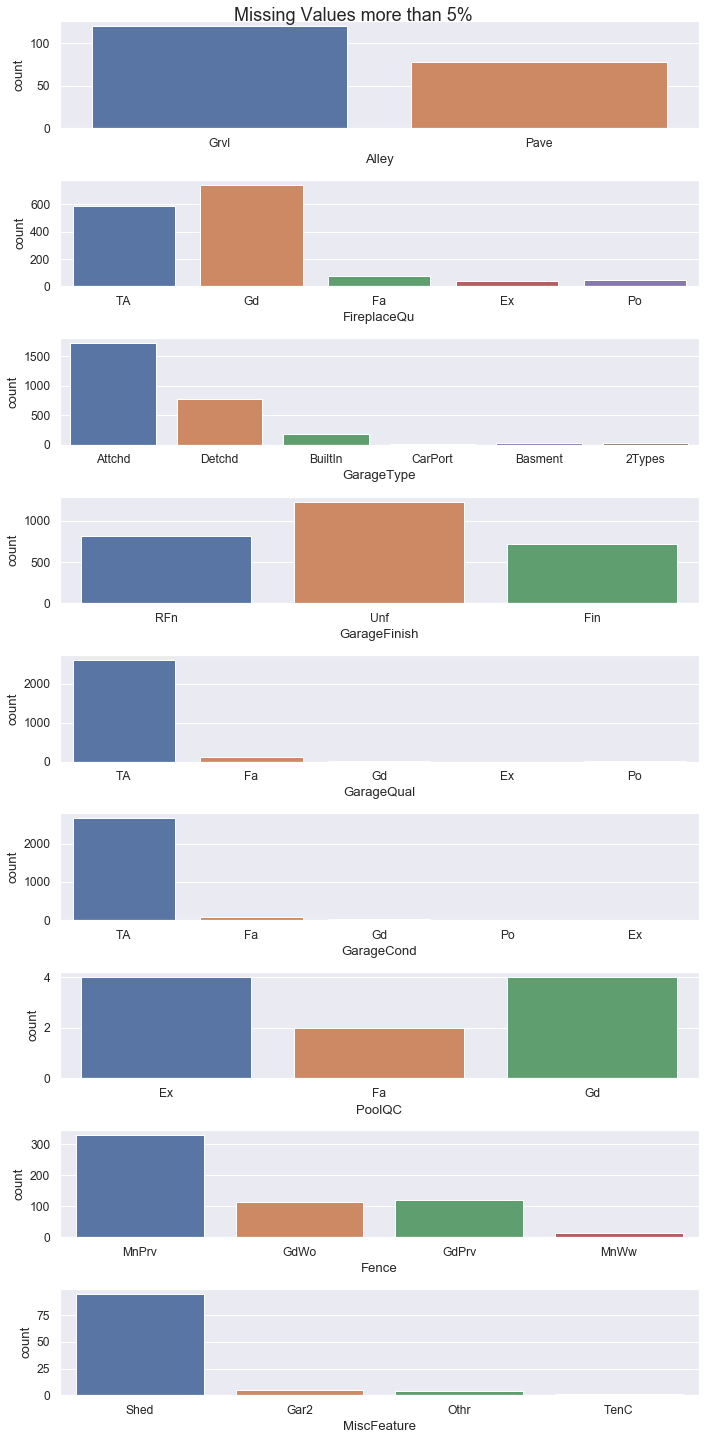

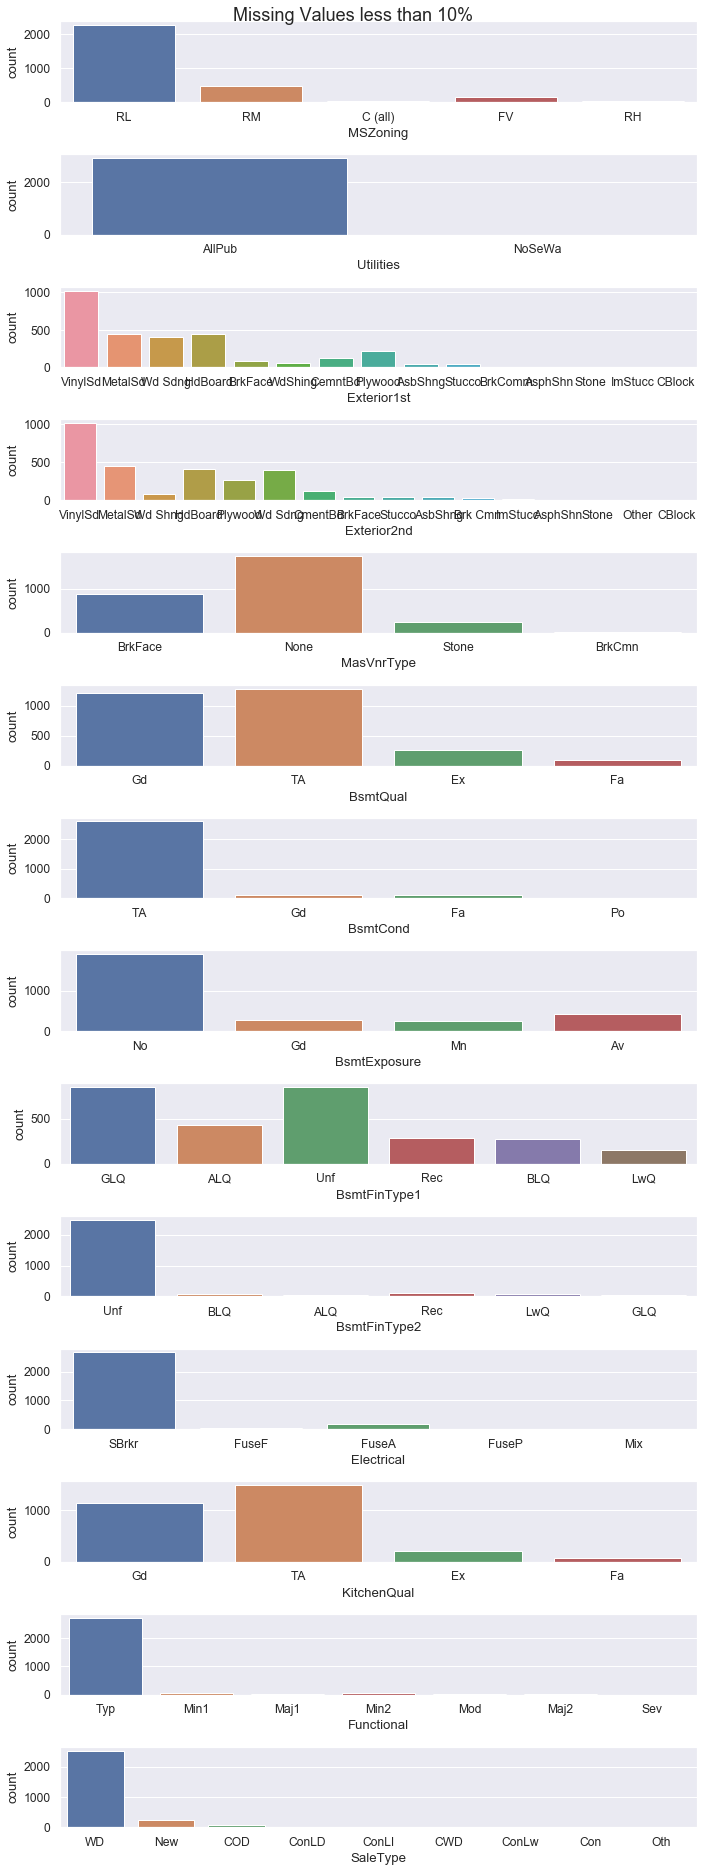

In [19]:
explore_mis_cat(categorical)

For categorical variable that have missing values more than missing value of GarageCond variables i will fill na with 'Missing'. 
             For the rest i can fill na with most frequent label or Random sample. In this case i will use Random sample because i want to preserves                    original variance 

In [20]:
missing = [n for n in categorical if all_data[n].isnull().mean() > 0]

In [21]:
missing

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [22]:
missing_impute_None = missing

In [23]:
for i in ['Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']:
    missing_impute_None.remove(i)

In [24]:
for i in missing_impute_None:
        all_data[i].fillna('None', inplace = True)

- ### Create Feature

In [25]:
df[year]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


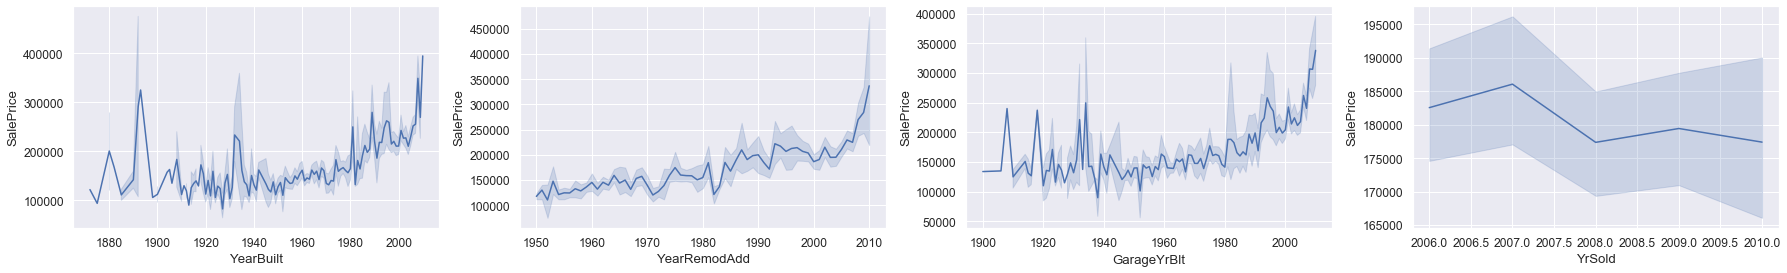

In [26]:
fig , ax = plt.subplots(1,4,figsize = (25,4))
sns.lineplot(x = df.YearBuilt , y = df.SalePrice,ax = ax[0])
sns.lineplot(x = df.YearRemodAdd , y = df.SalePrice , ax = ax[1])
sns.lineplot(x = df.GarageYrBlt , y = df.SalePrice , ax = ax[2])
sns.lineplot(x = df.YrSold , y = df.SalePrice , ax = ax[3])
plt.tight_layout()

In [27]:
def diff_year(df , var):
    df[var] = df['YrSold'] - df[var] 
    return df
for i in year:
    all_data  = diff_year(all_data , i)

In [28]:
all_data[year]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,0
1,31,31,31.0,0
2,7,6,7.0,0
3,91,36,8.0,0
4,8,8,8.0,0
...,...,...,...,...
1454,36,36,NaN,0
1455,36,36,36.0,0
1456,46,10,46.0,0
1457,14,14,NaN,0


In [29]:
year.remove('YrSold')

In [30]:
all_data.drop('YrSold', axis=1, inplace=True)

In [31]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal


In [32]:
all_data[:len(df)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,60,14,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1029.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,0,

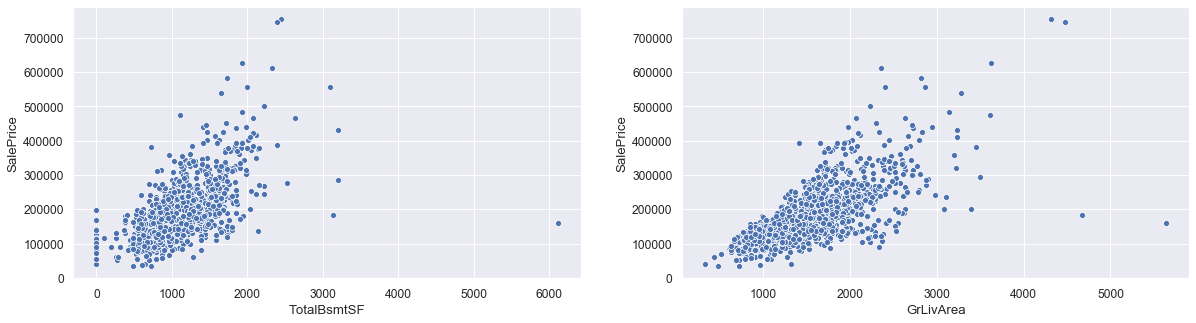

In [33]:
fig , ax = plt.subplots(1,2,figsize = (20,5))
sns.scatterplot(all_data[:len(df)].TotalBsmtSF,df.SalePrice,ax = ax[0])
sns.scatterplot(all_data[:len(df)].GrLivArea,df.SalePrice,ax = ax[1])

In [34]:
all_data['total_area'] = all_data['TotalBsmtSF']+all_data['GrLivArea']

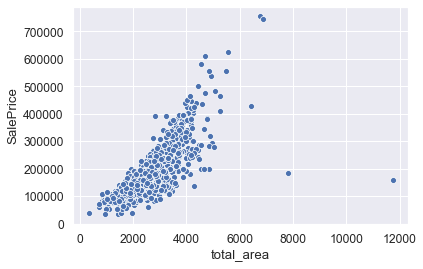

In [35]:
sns.scatterplot(all_data[:len(df)].total_area,df.SalePrice)

In [36]:
continuous.append('total_area')

- ### Missing values

#### categorical part 2

In [37]:
all_data[categorical].isnull().sum().sort_values(ascending = False)

MSZoning         4
Utilities        2
Functional       2
Electrical       1
SaleType         1
Exterior2nd      1
Exterior1st      1
KitchenQual      1
Condition2       0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Alley            0
LotShape         0
ExterQual        0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Street           0
LandContour      0
MasVnrType       0
SaleCondition    0
ExterCond        0
GarageType       0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
FireplaceQu      0
Foundation       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
dtype: int64

In [38]:
missing = [i for i in categorical if all_data[i].isnull().sum() > 0]

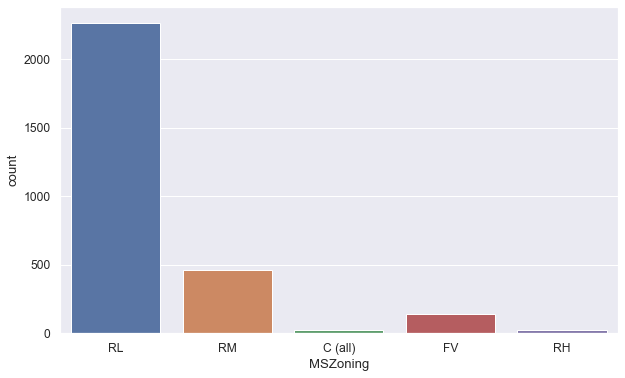

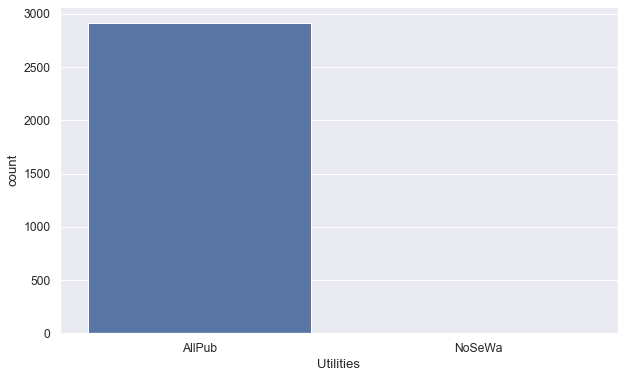

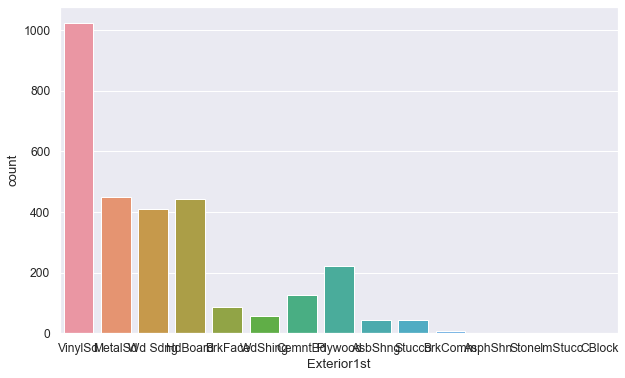

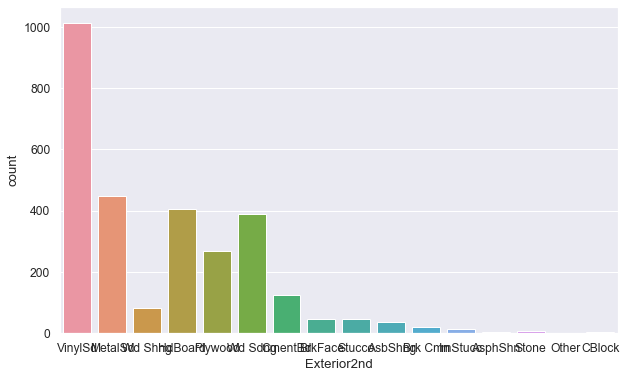

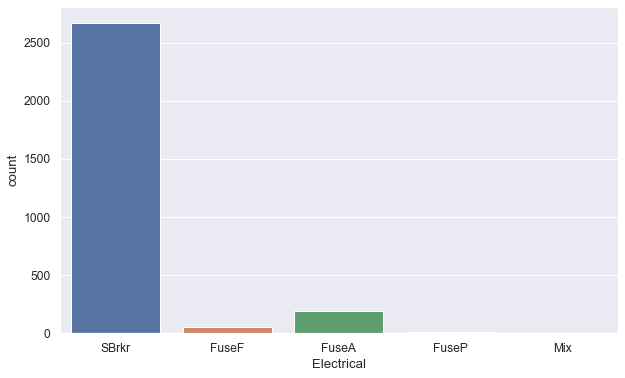

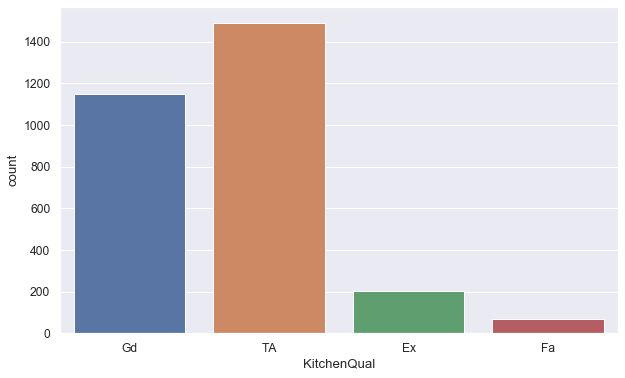

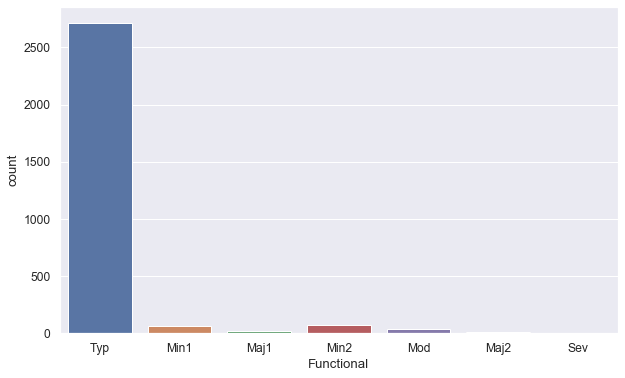

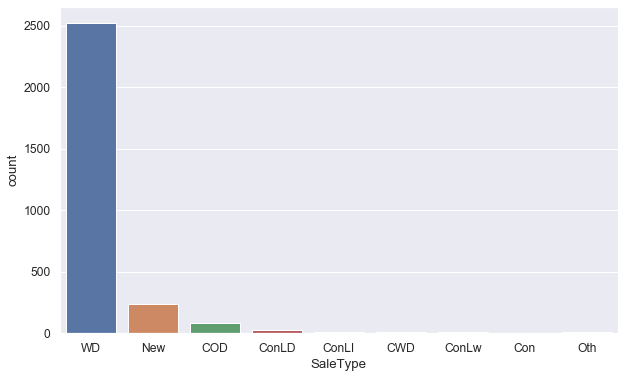

In [39]:
for i in missing:
    plt.figure(figsize=(10,6))
    sns.countplot(x = i , data = all_data)

In [40]:
for i in missing :
    all_data[i].fillna(all_data[i].mode()[0],inplace = True)

In [41]:
all_data[categorical].isnull().sum().any()

False

### continuous variables

In [42]:
all_data[continuous].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,total_area
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,2566.0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,2524.0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,2706.0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,2473.0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,3343.0


In [43]:
all_data[continuous].isnull().mean().sort_values(ascending = False)

LotFrontage      0.166495
MasVnrArea       0.007879
GarageArea       0.000343
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF      0.000343
total_area       0.000343
GrLivArea        0.000000
MiscVal          0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
LotArea          0.000000
LowQualFinSF     0.000000
dtype: float64

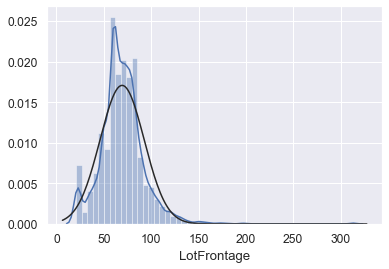

In [44]:
sns.distplot(all_data.LotFrontage.dropna(),fit = norm )

In [45]:
all_data.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

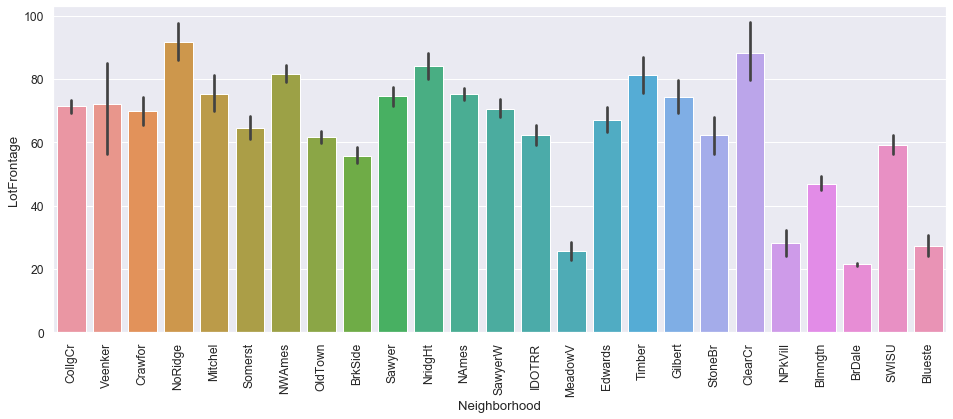

In [46]:
plt.figure(figsize=(16,6))
sns.barplot(x = all_data.Neighborhood , y=all_data.LotFrontage)
plt.xticks(rotation = 90)

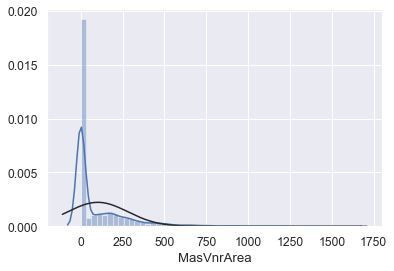

In [47]:
sns.distplot(all_data.MasVnrArea.dropna(), fit = norm)

In [48]:
all_data.MasVnrArea.describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

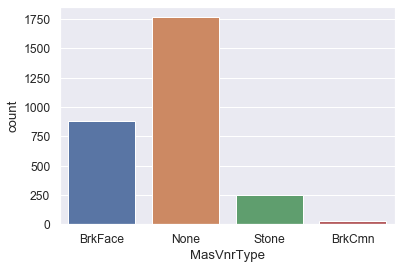

In [49]:
sns.countplot(all_data.MasVnrType)

LotFrontage i will fill na with median of Neighborhood and add missing indicator , MasVnrArea fill with median

In [50]:
#LotFrontage
all_data['LotFrontage_NA'] = np.where(all_data.LotFrontage.isnull(),1,0)
all_data['LotFrontage'].fillna(all_data.groupby('Neighborhood')['LotFrontage'].transform('median'),inplace = True)

In [51]:
for i in ['MasVnrArea','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    all_data[i].fillna(0,inplace = True)

In [52]:
all_data[all_data.total_area.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,total_area,LotFrontage_NA
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,62,58,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,62.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,ConLD,Abnorml,NaN,0


In [53]:
all_data.total_area.fillna(all_data.TotalBsmtSF + all_data.GrLivArea , inplace =True)

In [54]:
all_data[continuous].isnull().sum().any()

False

#### Date (Year) Variable

In [55]:
all_data[year].isnull().mean().sort_values(ascending = False)

GarageYrBlt     0.054471
YearRemodAdd    0.000000
YearBuilt       0.000000
dtype: float64

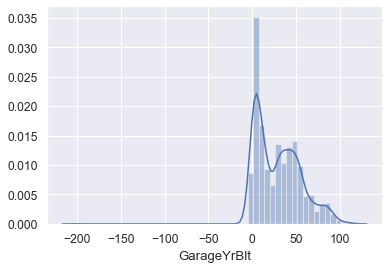

In [56]:
sns.distplot(all_data.GarageYrBlt.dropna())

In [57]:
all_data.GarageYrBlt.describe()

count    2760.000000
mean       29.676087
std        25.613957
min      -200.000000
25%         6.000000
50%        29.000000
75%        48.000000
max       114.000000
Name: GarageYrBlt, dtype: float64

In [58]:
len(all_data[all_data.GarageYrBlt == all_data.YearBuilt])

2216

For GarageYrBlt i will fill na with YearBuilt

In [59]:
all_data['GarageYrBlt_NA'] = np.where(all_data['GarageYrBlt'].isnull(),1,0)
all_data.GarageYrBlt.fillna(all_data.YearBuilt,inplace = True)

In [60]:
all_data[year].isnull().sum().any()

False

#### Discrete Variables

In [61]:
all_data[discrete].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1.0,0.0,2,1,3,1,8,0,2.0,0,2
1,20,6,8,0.0,1.0,2,0,3,1,6,1,2.0,0,5
2,60,7,5,1.0,0.0,2,1,3,1,6,1,2.0,0,9
3,70,7,5,1.0,0.0,1,0,3,1,7,1,3.0,0,2
4,60,8,5,1.0,0.0,2,1,4,1,9,1,3.0,0,12


In [62]:
all_data[discrete].isnull().mean().sort_values(ascending = False)

BsmtHalfBath    0.000685
BsmtFullBath    0.000685
GarageCars      0.000343
MoSold          0.000000
PoolArea        0.000000
Fireplaces      0.000000
TotRmsAbvGrd    0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
HalfBath        0.000000
FullBath        0.000000
OverallCond     0.000000
OverallQual     0.000000
MSSubClass      0.000000
dtype: float64

In [63]:
for i in ['BsmtHalfBath','BsmtFullBath','GarageCars']:
    all_data[i].fillna(0,inplace = True)

- ### Outliers

#### Continuous Variables

In [64]:
all_data[continuous].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,total_area
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,2566.0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,2524.0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,2706.0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,2473.0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,3343.0


In [65]:
all_data[continuous].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,total_area
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.542994,10168.114080,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,50.825968,2552.177115
std,21.703256,7886.996359,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,567.402211,806.018663
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,60.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
50%,70.000000,9453.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2453.000000
75%,80.000000,11570.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,2996.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,17000.000000,11752.000000


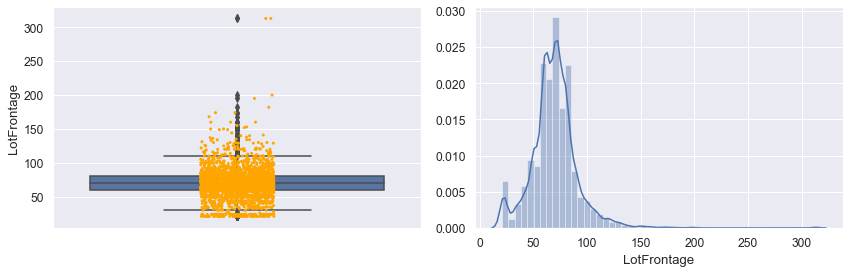

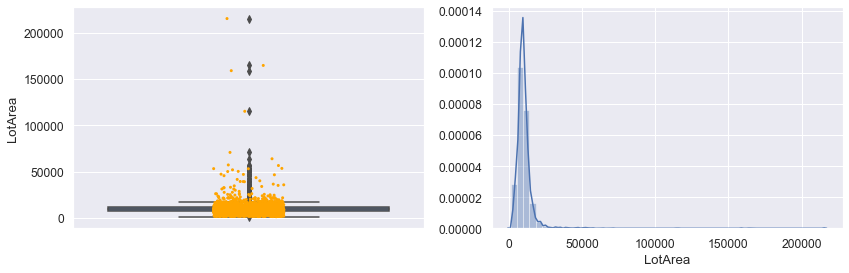

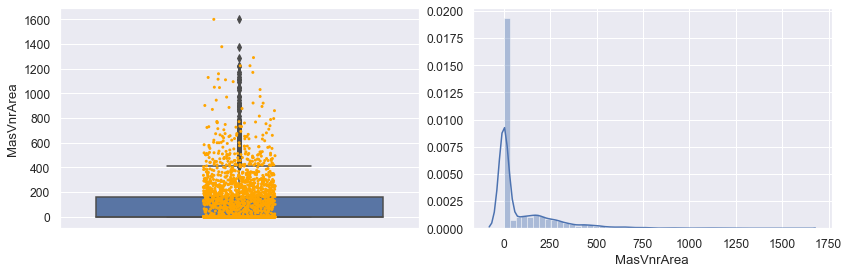

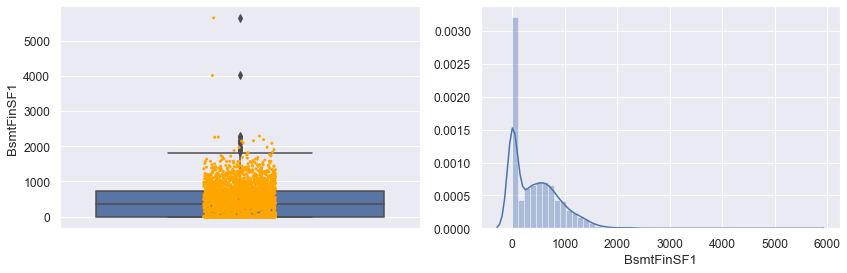

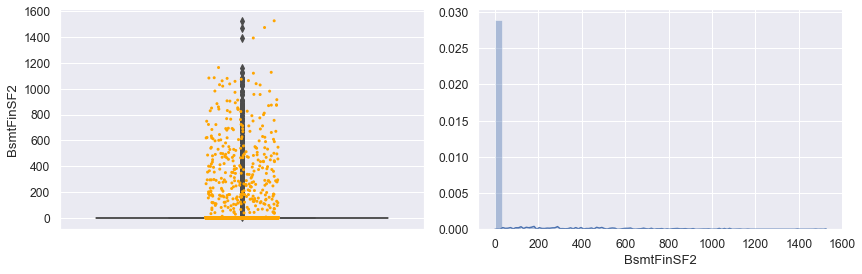

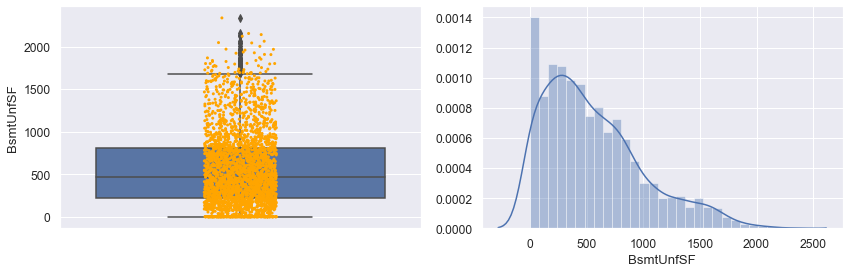

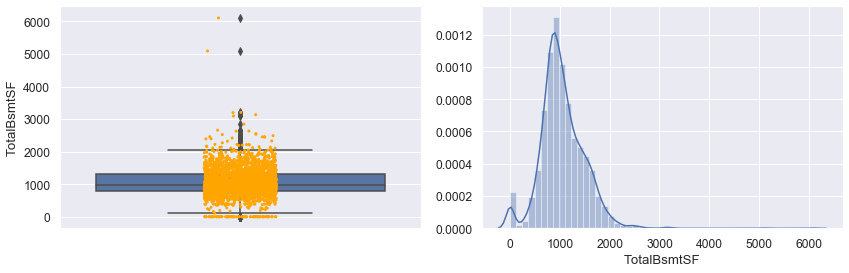

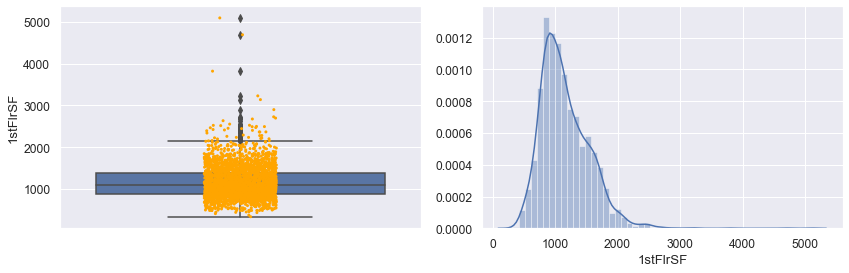

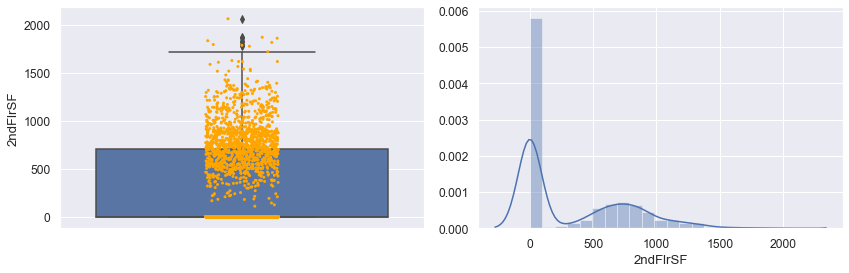

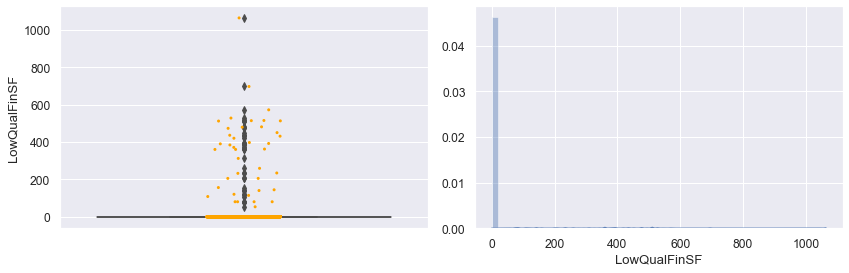

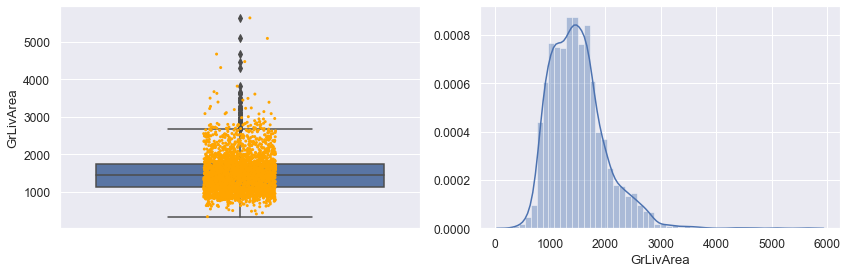

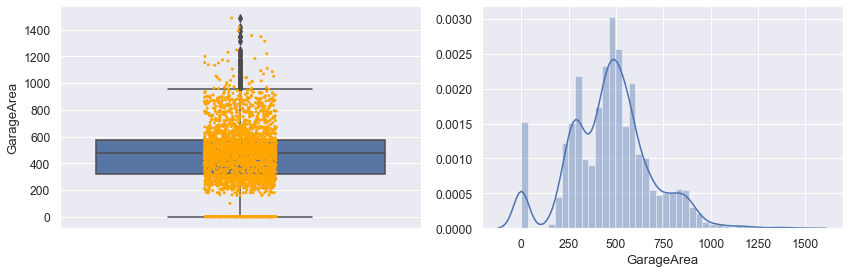

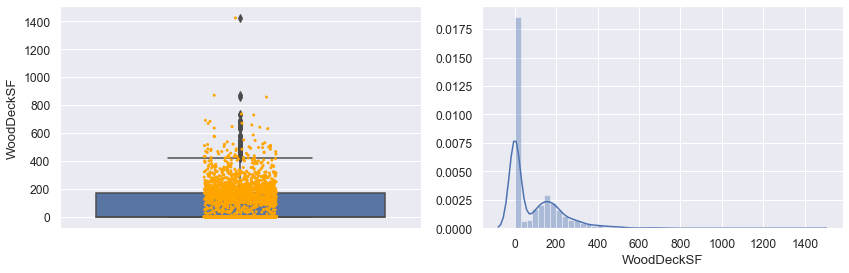

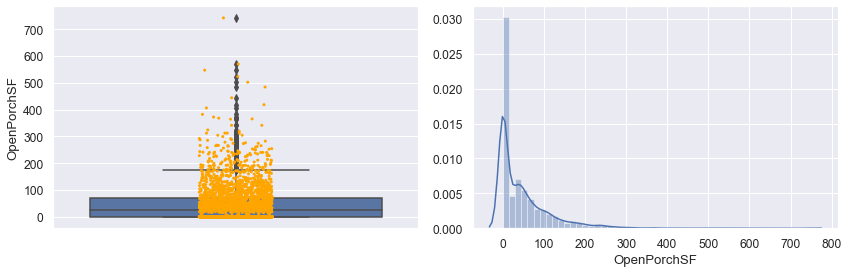

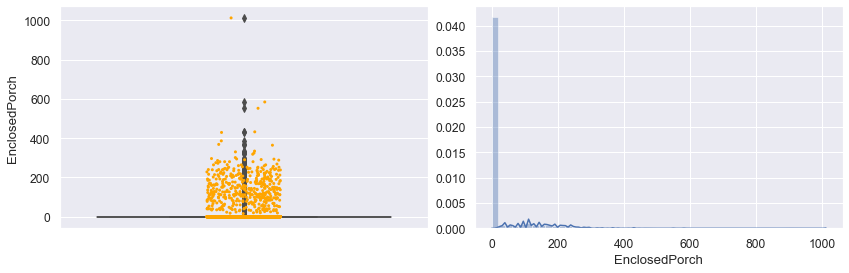

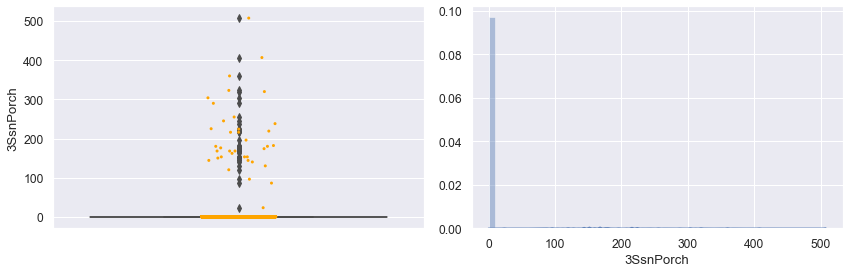

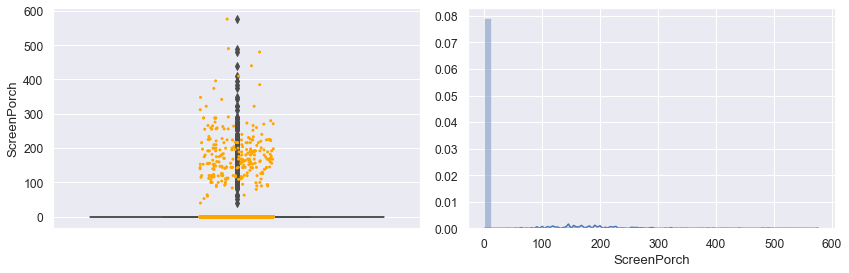

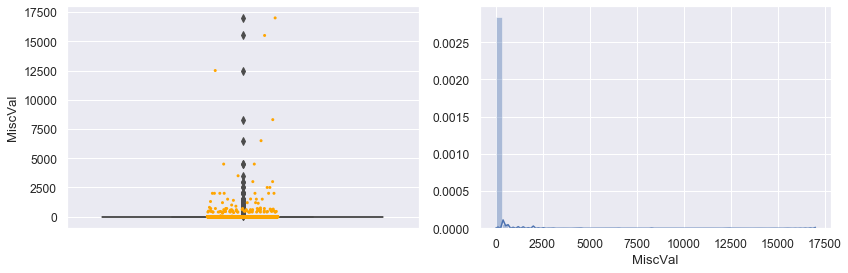

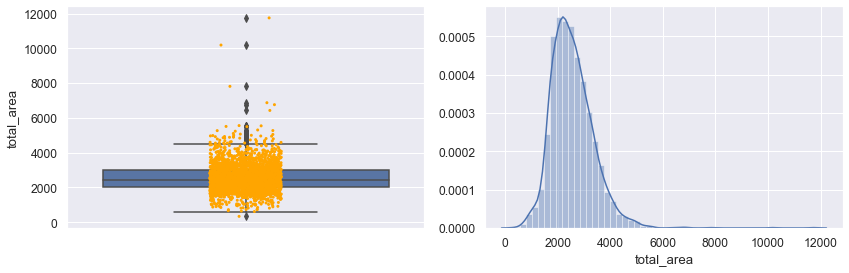

In [66]:
for i in continuous:
    fig , ax = plt.subplots(1,2,figsize = (12,4))
    sns.boxplot(y = i,data = all_data , ax = ax[0])
    sns.stripplot(y = i ,data = all_data ,color = 'orange' , size = 3 , ax = ax[0])
    sns.distplot(all_data[i].dropna() , ax = ax[1])
    plt.tight_layout()

Every continuous variables have outlier so i can handle it by discretisation , trimming and capping in this case i will choose discretisation

In [67]:
def tree_discretisation(var):
# call the model
    tree_model = DecisionTreeRegressor()
    tree_para = {'criterion':['mse'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[0.1,0.3,0.5,1,2,3,4,5]}

    gridsearch = GridSearchCV(tree_model, tree_para,
                              scoring = 'neg_mean_squared_error',cv = 12, n_jobs = -1)
    gridsearch.fit(all_data[:len(df)][var].to_frame() , df.SalePrice)
    
    tree_model = gridsearch.best_estimator_
    tree_model.fit(all_data[:len(df)][var].to_frame(), df.SalePrice)
    all_data[var] = tree_model.predict(all_data[var].to_frame())

In [68]:
for var in continuous:
    tree_discretisation(var)

In [69]:
all_data[continuous].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,total_area
0,169075.840541,152104.247664,231964.023891,164990.664173,182069.628698,184132.138399,155346.720121,145506.246479,209942.986577,181425.082927,205856.696552,200667.173502,157391.229798,221863.420394,186856.880990,180921.19589,178779.153846,181964.703835,186296.632530
1,185930.564356,170873.346429,157285.511468,209432.116279,182069.628698,184132.138399,189266.196429,179606.974194,171273.449398,181425.082927,155092.132597,166821.285141,223008.401685,144474.322188,186856.880990,180921.19589,178779.153846,181964.703835,173843.809524
2,169075.840541,214277.471910,184495.721190,164990.664173,182069.628698,184132.138399,155346.720121,145506.246479,209942.986577,181425.082927,196899.440476,200667.173502,157391.229798,195884.384058,186856.880990,180921.19589,178779.153846,181964.703835,186296.632530
3,140053.718062,170873.346429,157285.511468,164990.664173,182069.628698,184132.138399,155346.720121,145506.246479,165323.812834,181425.082927,205856.696552,200667.173502,157391.229798,195884.384058,156880.802083,180921.19589,178779.153846,181964.703835,149340.360000
4,231028.663866,252308.143617,231964.023891,164990.664173,182069.628698,184132.138399,189266.196429,179606.974194,268946.250000,181425.082927,244424.784810,288622.690821,223008.401685,221863.420394,186856.880990,180921.19589,178779.153846,181964.703835,242822.056604


In [70]:
for i in continuous:
    print(i,all_data[i].nunique())

LotFrontage 13
LotArea 6
MasVnrArea 4
BsmtFinSF1 4
BsmtFinSF2 4
BsmtUnfSF 7
TotalBsmtSF 8
1stFlrSF 30
2ndFlrSF 12
LowQualFinSF 3
GrLivArea 31
GarageArea 6
WoodDeckSF 4
OpenPorchSF 4
EnclosedPorch 6
3SsnPorch 1
ScreenPorch 2
MiscVal 2
total_area 31


In [71]:
tmp = pd.concat([all_data[:len(df)],df.SalePrice],axis = 1)

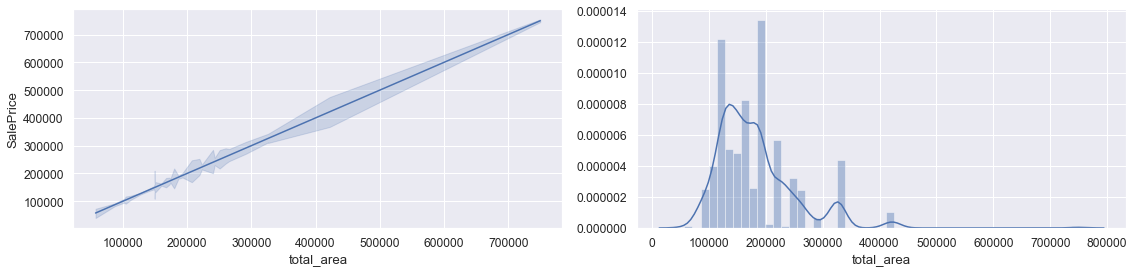

In [72]:
fig , ax = plt.subplots(1,2,figsize = (16,4))
sns.lineplot(x = 'total_area', y = 'SalePrice' , data = tmp , ax = ax[0])
sns.distplot(tmp.total_area, ax = ax[1])
plt.tight_layout()

#### Discrete variables

In [73]:
all_data[discrete].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1.0,0.0,2,1,3,1,8,0,2.0,0,2
1,20,6,8,0.0,1.0,2,0,3,1,6,1,2.0,0,5
2,60,7,5,1.0,0.0,2,1,3,1,6,1,2.0,0,9
3,70,7,5,1.0,0.0,1,0,3,1,7,1,3.0,0,2
4,60,8,5,1.0,0.0,2,1,4,1,9,1,3.0,0,12


In [74]:
def plot_discrete(df, typ):
    tmp = pd.DataFrame((all_data[typ].value_counts()/all_data[typ].count()).reset_index())
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x = 'index', y = typ , data = tmp , order = tmp['index'] , palette = "inferno")
    ax.axhline(y=0.03, color='black')
    plt.tight_layout()

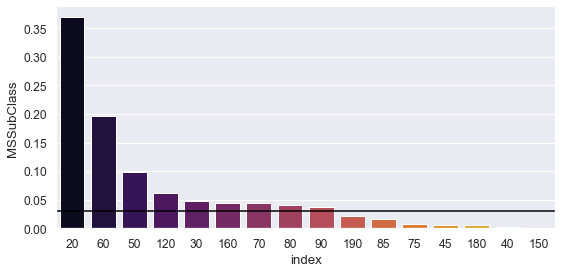

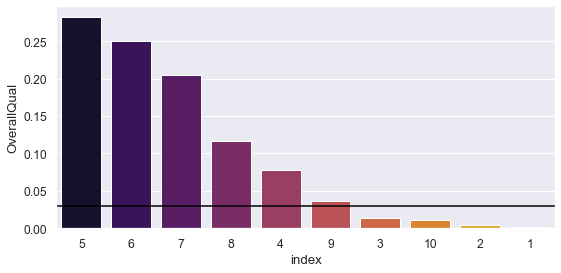

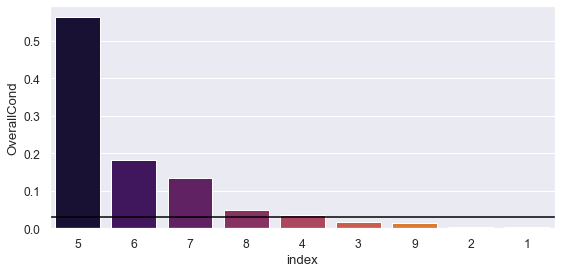

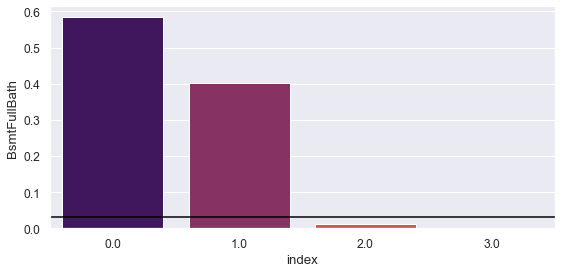

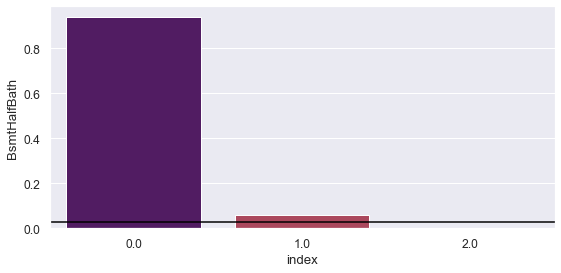

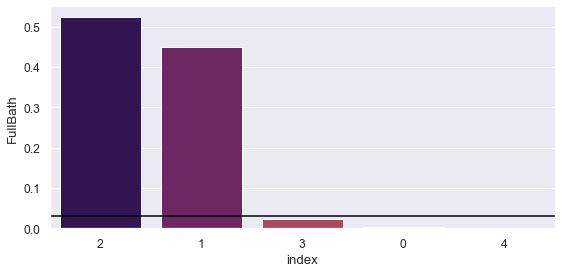

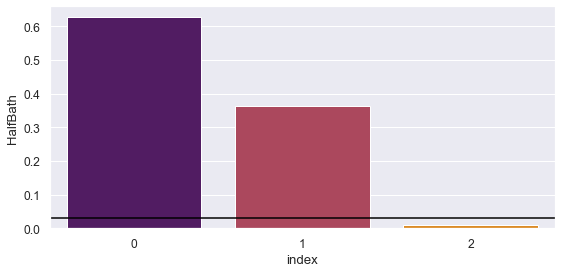

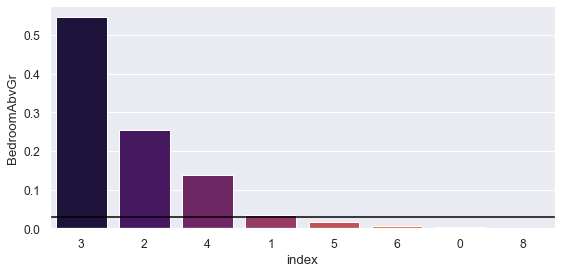

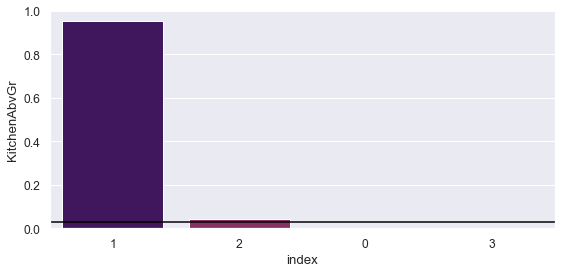

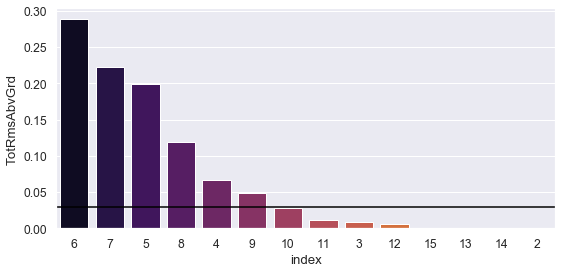

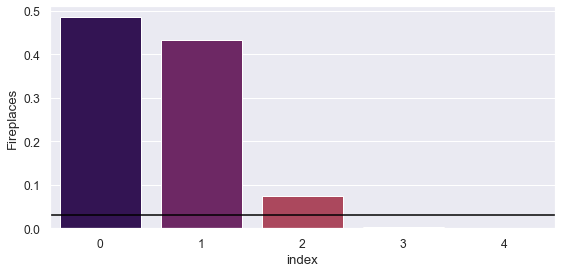

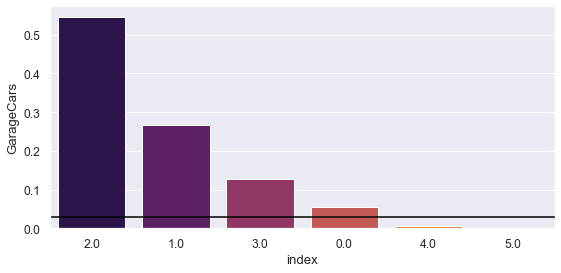

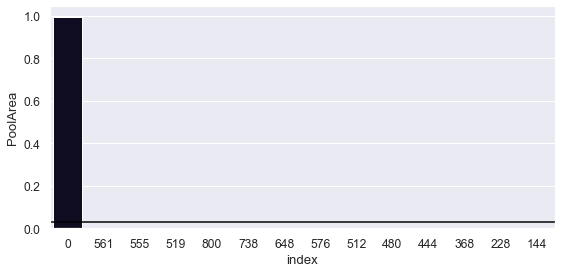

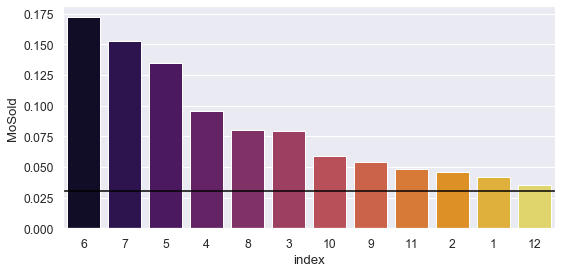

In [75]:
for i in discrete:
    plot_discrete(df,i)

for labels that occure less than 3% I will regroup it into rare labels

In [76]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = all_data.groupby([variable])[variable].count()/np.float(len(all_data))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    all_data[variable] = np.where(all_data[variable].isin(frequent_cat), all_data[variable], 'Rare')

In [77]:
for var in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    all_data[var] = all_data[var].astype('int')

In [78]:
for var in discrete:
    rare_imputation(var)

In [79]:
all_data.isnull().sum().any()

False

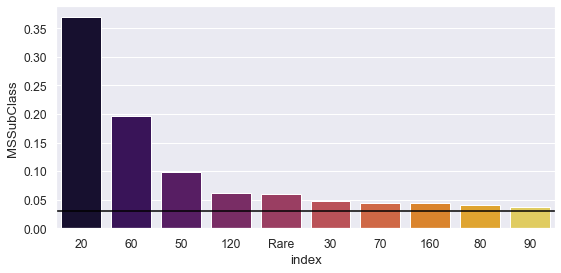

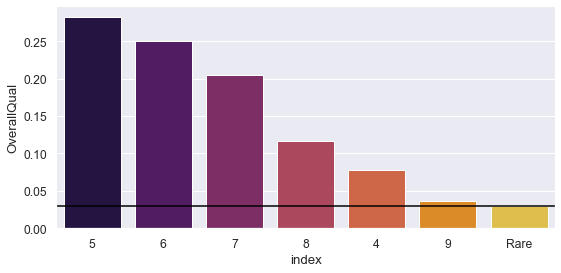

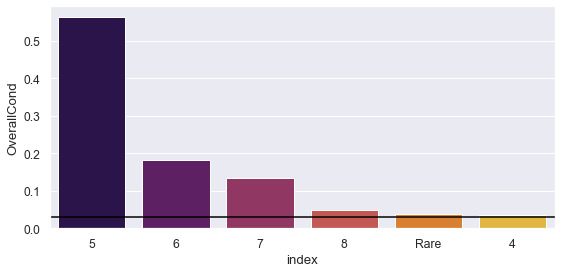

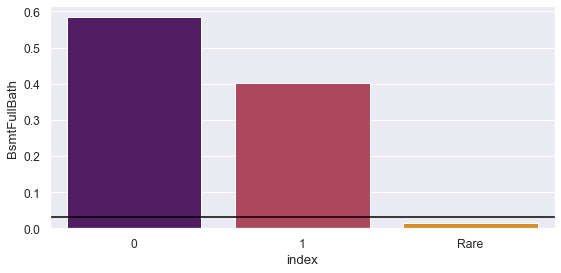

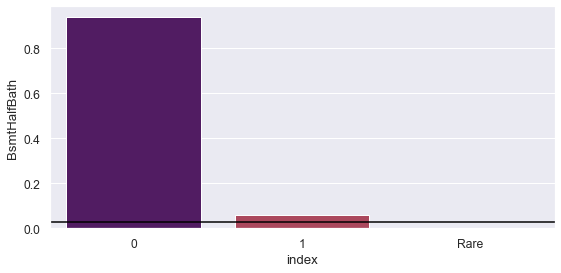

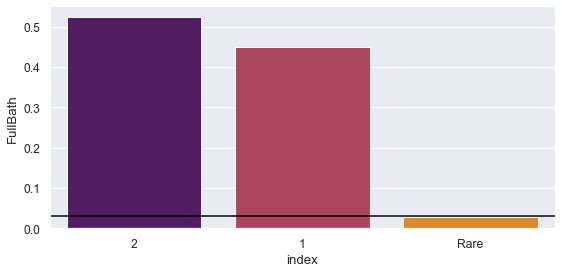

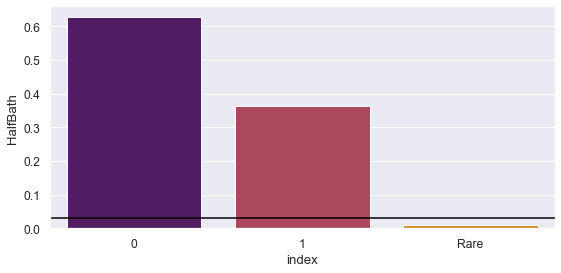

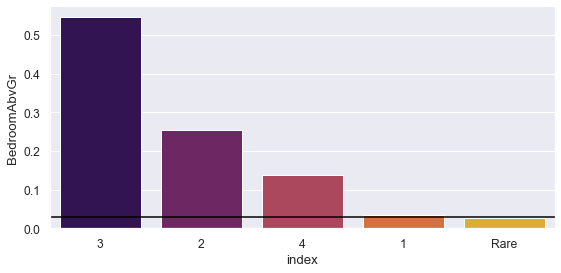

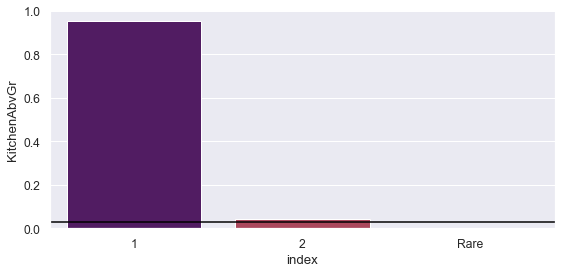

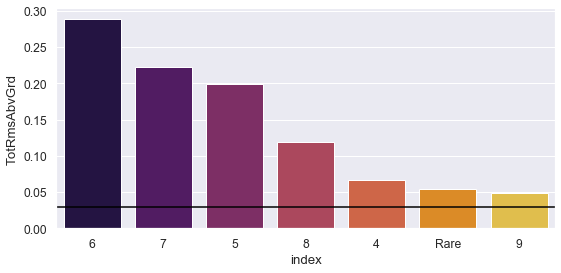

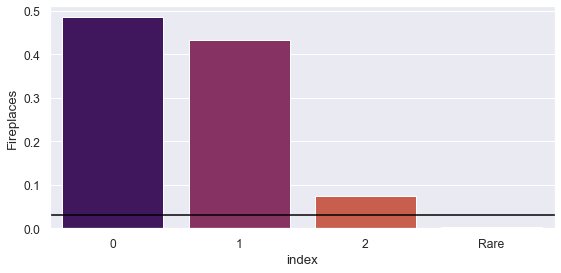

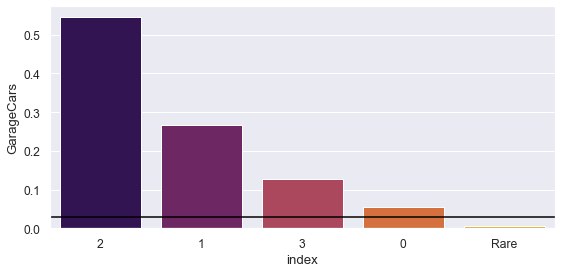

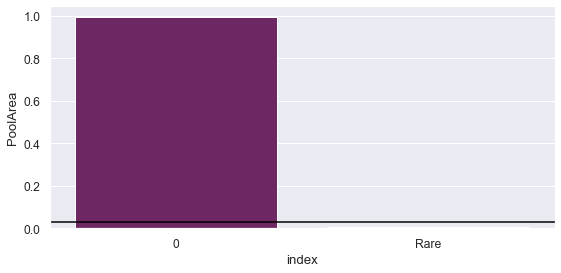

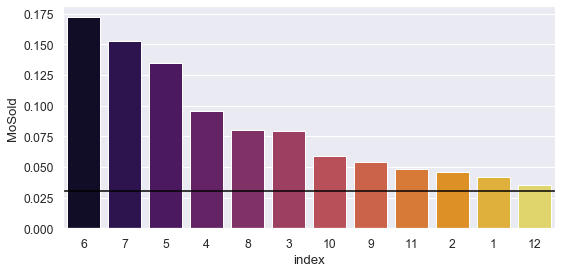

In [80]:
for i in discrete:
    plot_discrete(submission,i)

- ### Cardinality

In [81]:
all_data[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [82]:
tmp = [all_data[i].nunique() for i in categorical]
tmp = pd.DataFrame(tmp,columns = ['num_labels'])
tmp['col_name'] = pd.Series(all_data[categorical].columns)
tmp.sort_values(['num_labels'] , ascending = False ,inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

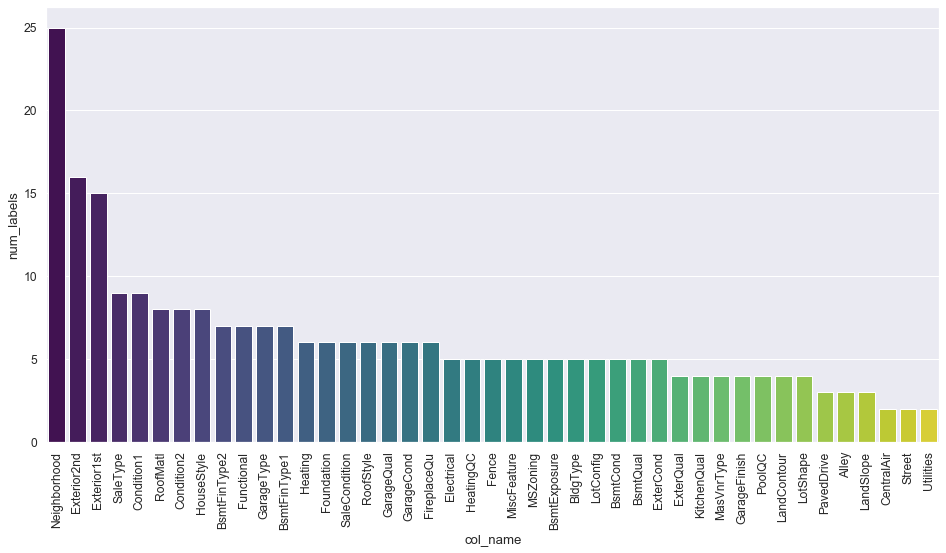

In [83]:
plt.subplots(figsize = (16,8) )
sns.barplot(x = 'col_name' , y = 'num_labels' , data = tmp , palette = 'viridis' )
plt.xticks(rotation = 90)

In [84]:
for var in categorical:
    rare_imputation(var)

In [85]:
all_data.isnull().sum().any()

False

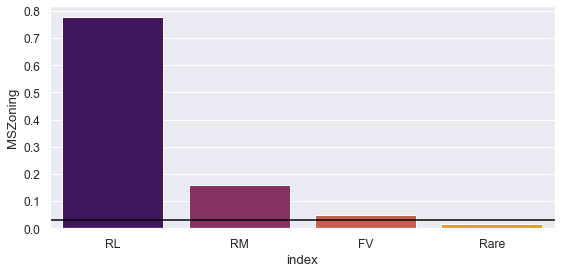

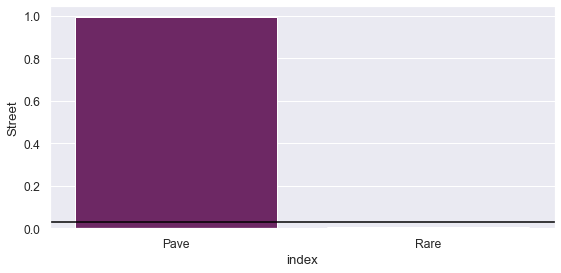

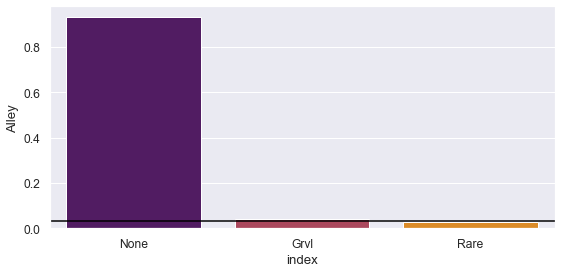

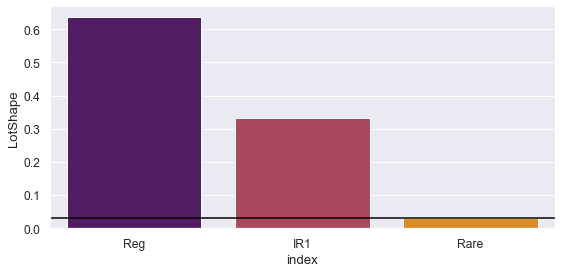

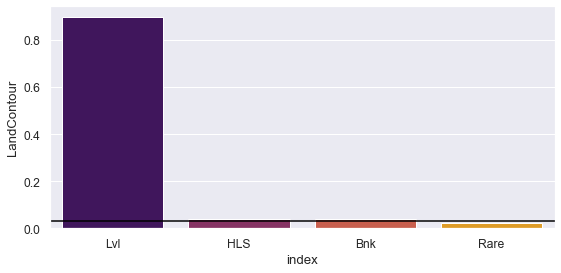

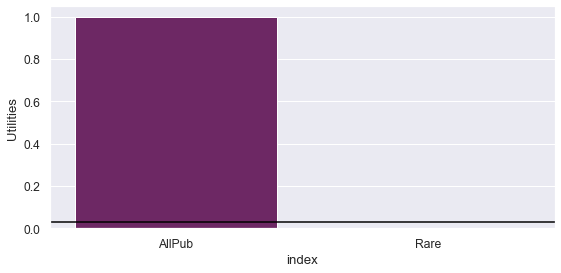

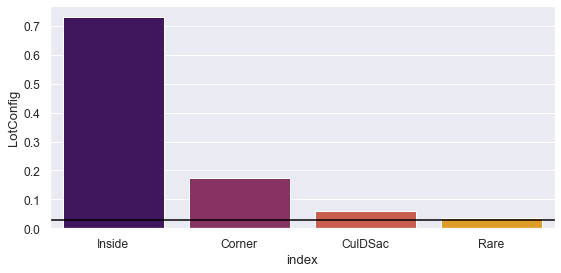

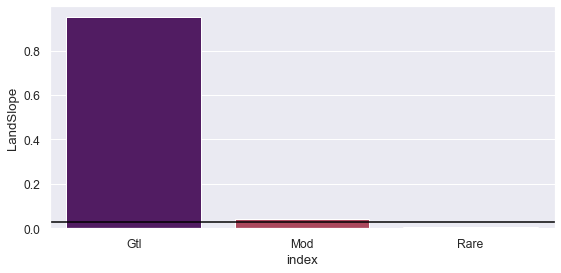

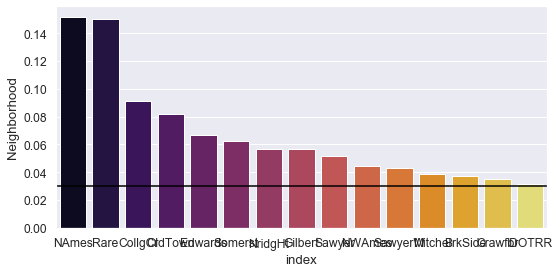

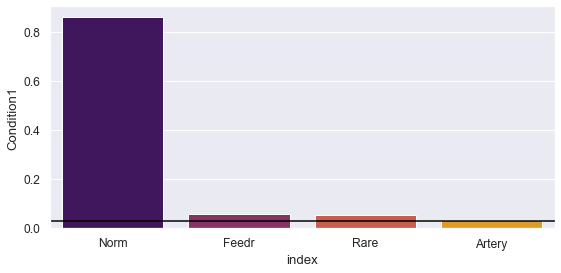

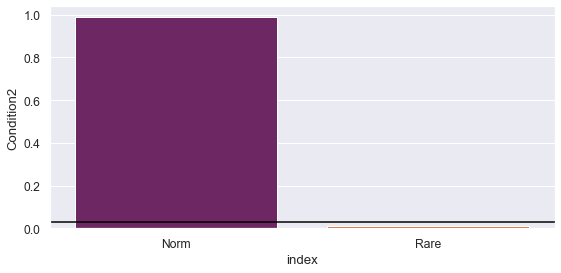

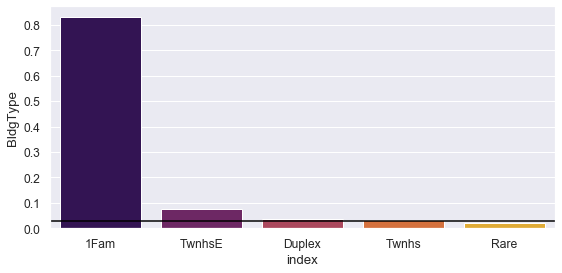

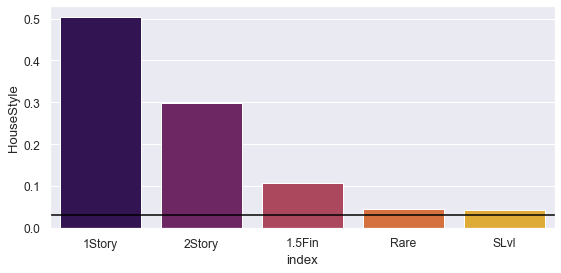

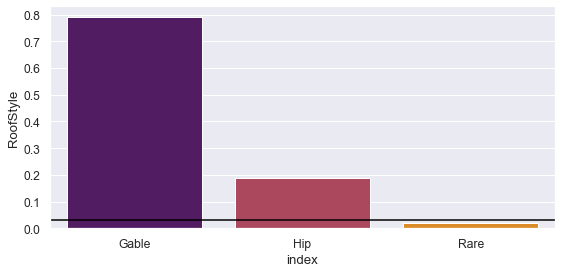

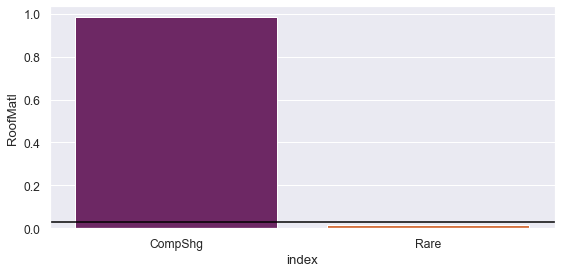

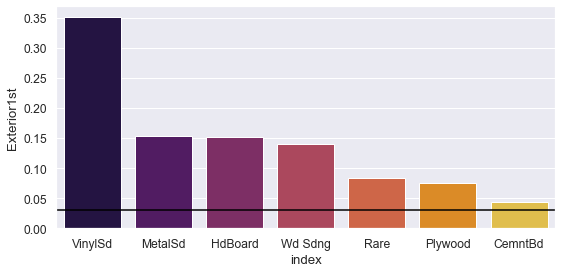

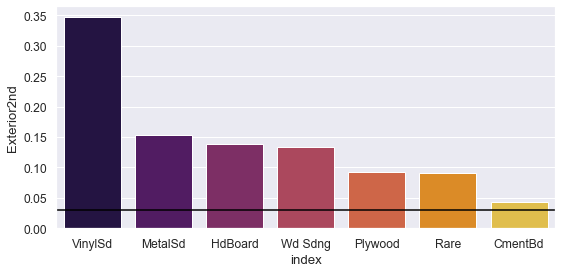

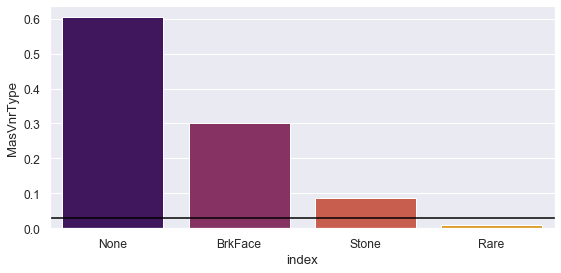

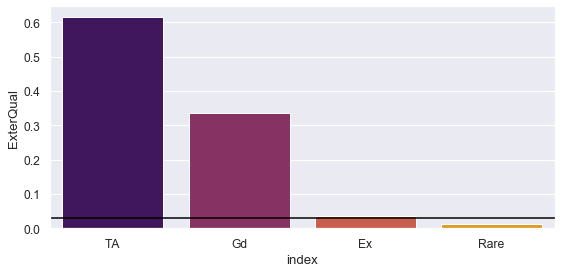

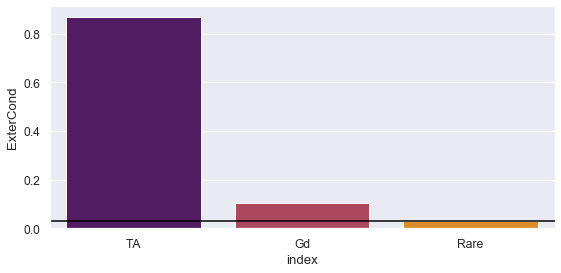

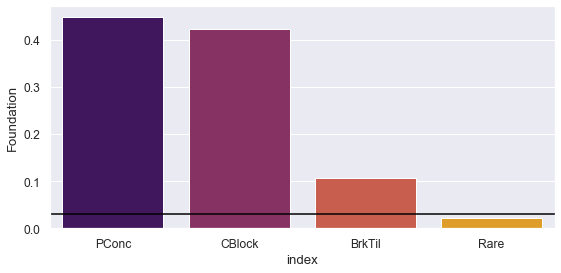

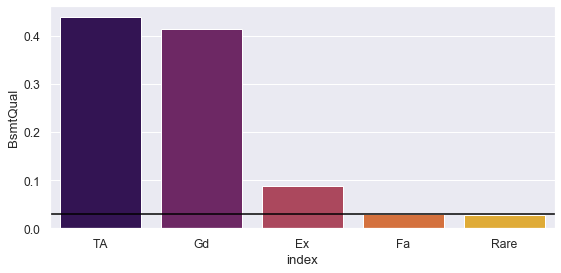

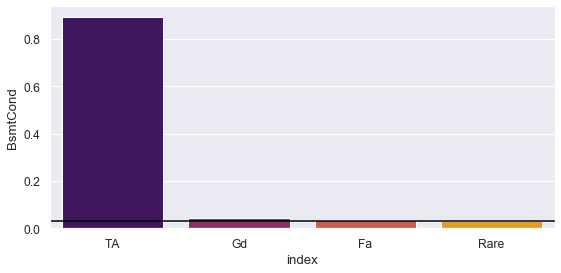

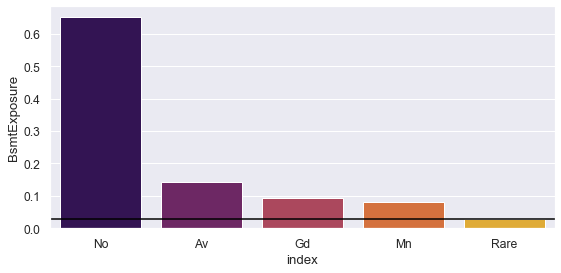

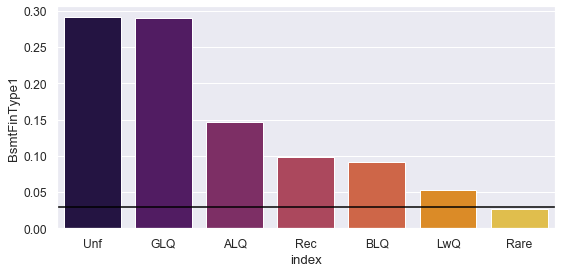

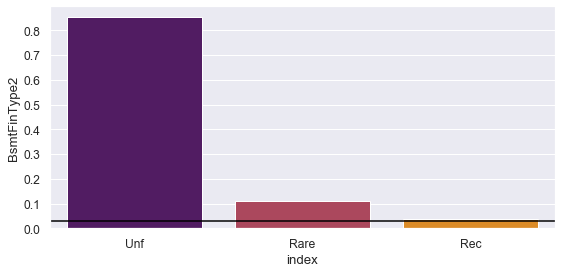

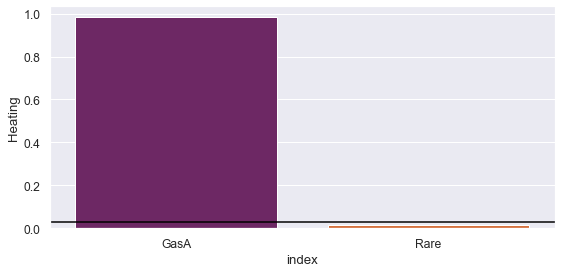

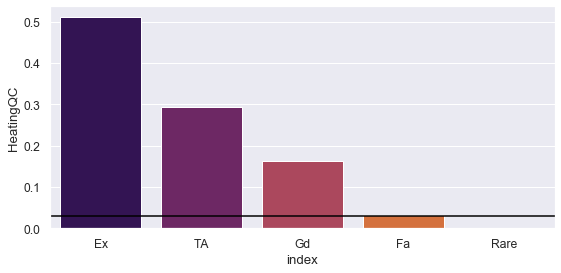

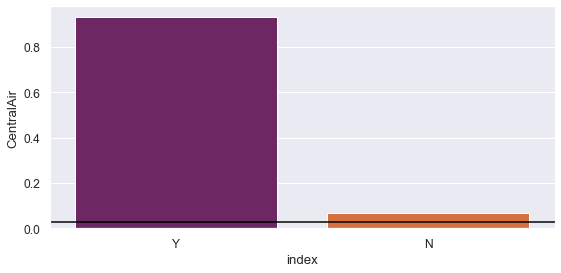

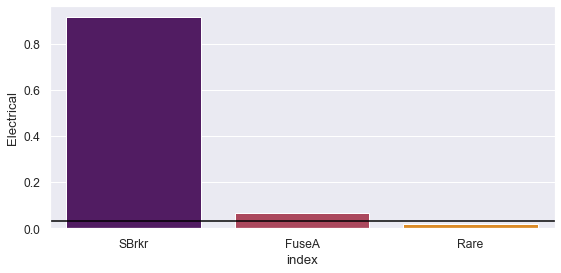

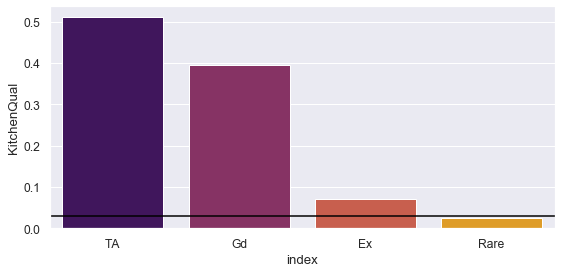

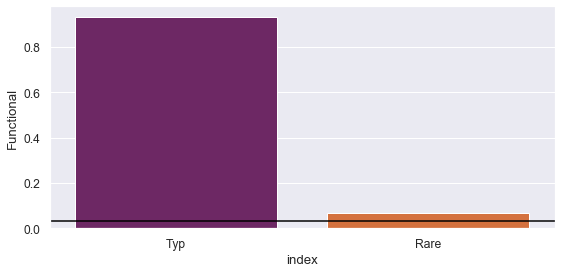

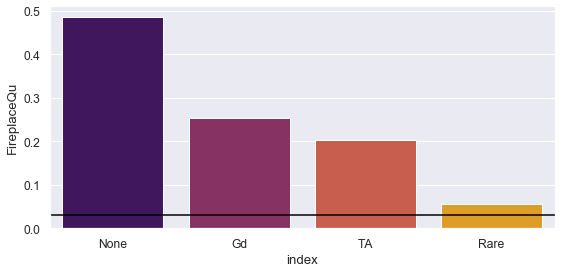

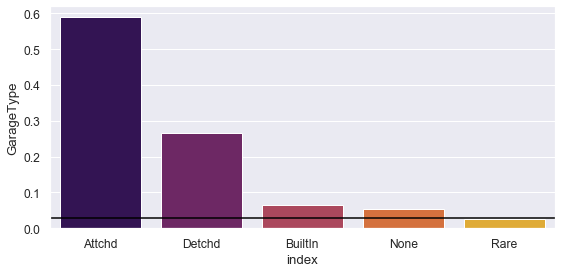

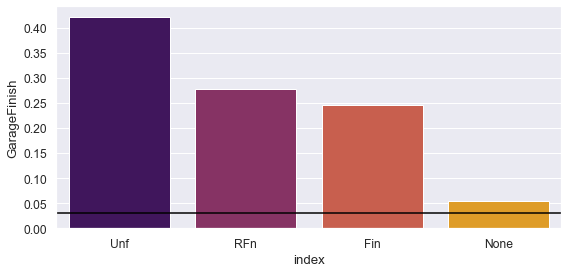

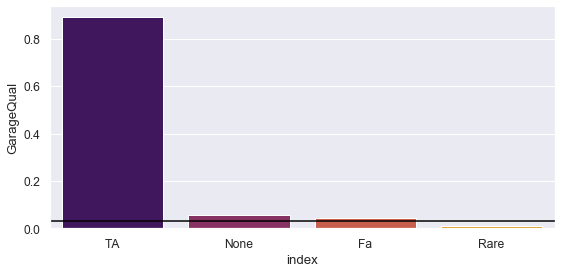

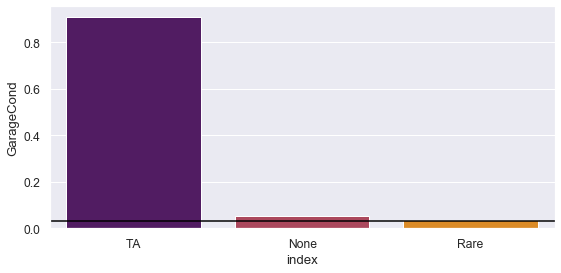

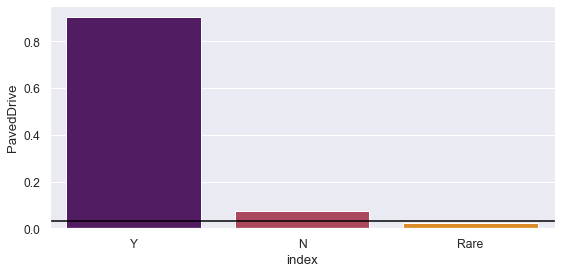

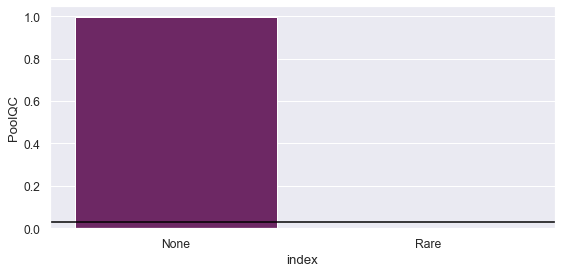

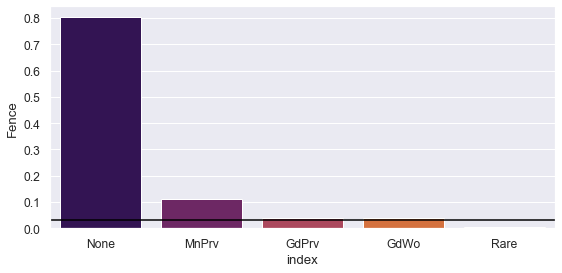

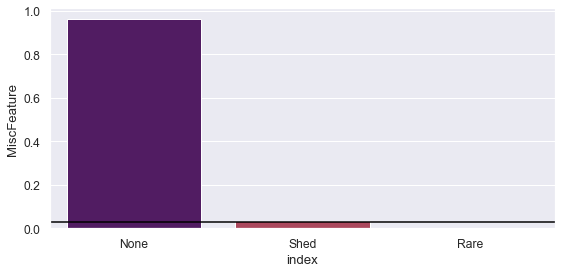

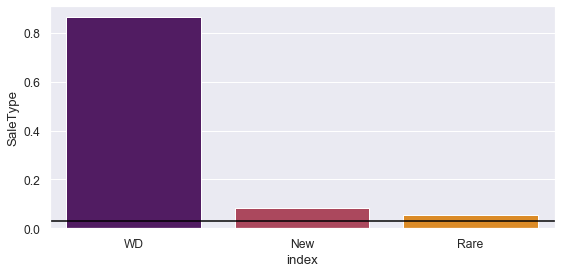

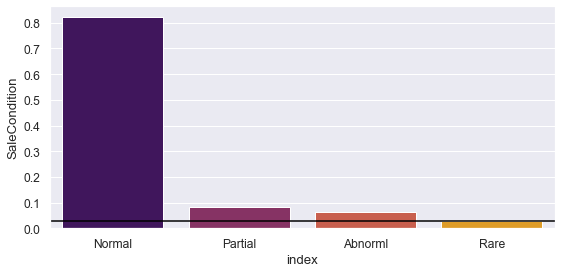

In [86]:
for i in categorical:
    plot_discrete(all_data,i)

- ### Categorical and Discrete Encoders

In [87]:
all_data_med = all_data[:len(df)]

In [88]:
all_data_med = pd.concat([all_data_med,df.SalePrice],axis = 1)

In [89]:
all_data_med_sub = all_data[len(df):]

In [90]:
all_data_med_sub.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,total_area,LotFrontage_NA,GarageYrBlt_NA
0,1461,20,Rare,185930.564356,214277.471910,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,157285.511468,TA,TA,CBlock,TA,TA,No,Rec,164990.664173,Rare,182069.628698,184132.138399,155346.720121,GasA,TA,Y,SBrkr,145506.246479,171273.449398,181425.082927,119760.735160,0,0,1,0,2,1,TA,5,Typ,0,None,Attchd,49.0,Unf,1,288622.690821,TA,TA,Y,205191.109756,144474.322188,186856.88099,180921.19589,178779.153846,0,None,MnPrv,None,181964.703835,6,WD,Normal,126535.729084,0,0
1,1462,20,RL,231028.663866,252308.143617,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,184495.721190,TA,TA,CBlock,TA,TA,No,ALQ,209432.116279,Unf,182069.628698,184132.138399,206315.892562,GasA,TA,Y,SBrkr,191502.179641,171273.449398,181425.082927,155092.132597,0,0,1,1,3,1,Gd,6,Typ,0,None,Attchd,52.0,Unf,1,136027.000000,TA,TA,Y,223008.401685,195884.384058,186856.88099,180921.19589,178779.153846,0,None,None,Rare,152666.211538,6,WD,Normal,186296.632530,0,0
2,1463,60,RL,169075.840541,252308.143617,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,157285.511468,TA,TA,PConc,Gd,TA,No,GLQ,164990.664173,Unf,182069.628698,184132.138399,155346.720121,GasA,Gd,Y,SBrkr,145506.246479,165323.812834,181425.082927,205856.696552,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2,179030.719512,TA,TA,Y,223008.401685,195884.384058,186856.88099,180921.19589,178779.153846,0,None,MnPrv,None,181964.703835,3,WD,Normal,186296.632530,0,0
3,1464,60,RL,197550.052174,184625.785311,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,184495.721190,TA,TA,PConc,TA,TA,No,GLQ,164990.664173,Unf,182069.628698,184132.138399,155346.720121,GasA,Ex,Y,SBrkr,145506.246479,165323.812834,181425.082927,186118.408333,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2,179030.719512,TA,TA,Y,223008.401685,195884.384058,186856.88099,180921.19589,178779.153846,0,None,None,None,181964.703835,6,WD,Normal,149523.500000,0,0
4,1465,120,RL,207081.094340,138997.964072,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,157285.511468,Gd,TA,PConc,Gd,TA,No,ALQ,164990.664173,Unf,182069.628698,166692.201923,189266.196429,GasA,Ex,Y,SBrkr,191502.179641,171273.449398,181425.082927,155092.132597,0,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,18.0,RFn,2,179030.719512,TA,TA,Y,157391.229798,221863.420394,186856.88099,180921.19589,178779.153846,0,None,None,None,181964.703835,1,WD,Normal,186296.632530,0,0


In [93]:
# use mean encoding
def encode_variables(var, target):
        # make label to price dictionary
        ordered_labels = all_data_med.groupby([var])[target].median().to_dict()
        # encode variables
        all_data_med[var] = all_data_med[var].map(ordered_labels)
        all_data_med_sub[var] = all_data_med_sub[var].map(ordered_labels)

In [94]:
# encode labels in categorical vars
for var in categorical:
    encode_variables(var, 'SalePrice')

In [95]:
all_data_med_sub[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,107500,163000,165000,146000,162900,163000,159697.5,161875,140000,140000,163500,167900,154750,160000,162000,200000.0,200070.5,143125,139450.0,167370,141500,135500,165000,154000,142000,142976.5,164500,135000,168000,170000,137000,165500,135000,185000,135000,170000,170000,168500,162900,137450,164250,158000,160000
1,174000,163000,165000,189000,162900,163000,160000.0,161875,140000,166500,163500,167900,154750,176500,162000,138943.5,138000.0,181000,139450.0,167370,141500,135500,165000,154000,149250,167000.0,164500,135000,168000,170000,201400,165500,135000,185000,135000,170000,170000,168500,162900,173000,151500,158000,160000
2,174000,163000,165000,189000,162900,163000,159697.5,161875,181000,166500,163500,167900,190000,160000,162000,200000.0,200070.5,143125,139450.0,167370,205000,192070,165000,154000,213750,167000.0,164500,152000,168000,170000,137000,165500,187500,185000,215000,170000,170000,168500,162900,137450,164250,158000,160000
3,174000,163000,165000,189000,162900,163000,159697.5,161875,181000,166500,163500,167900,190000,160000,162000,200000.0,200070.5,181000,139450.0,167370,205000,135500,165000,154000,213750,167000.0,164500,194700,168000,170000,201400,165500,206950,185000,215000,170000,170000,168500,162900,173000,164250,158000,160000
4,174000,163000,165000,189000,222250,163000,159697.5,161875,197000,166500,163500,172200,154750,160000,162000,149900.0,155000.0,143125,220000.0,167370,205000,192070,165000,154000,149250,167000.0,164500,194700,168000,170000,201400,165500,135000,185000,190000,170000,170000,168500,162900,173000,164250,158000,160000


In [96]:
all_data_med.isnull().sum().any()

False

In [97]:
all_data_med[discrete].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


In [98]:
for var in discrete:
    encode_variables(var , 'SalePrice' )

In [99]:
all_data_med[discrete].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,215200,200141,185000,178800,163250.0,196750,189000.0,169945,165550,200000,135000,177750,162900,173250
1,159250,160000,142500,154150,159000.0,196750,143000.0,169945,165550,155000,189975,177750,162900,154000
2,215200,200141,185000,178800,163250.0,196750,189000.0,169945,165550,155000,189975,177750,162900,185900
3,156000,200141,185000,178800,163250.0,132375,143000.0,169945,165550,184100,189975,295000,162900,173250
4,215200,269750,185000,178800,163250.0,196750,189000.0,193500,165550,252000,189975,295000,162900,178000


In [100]:
all_data_med_sub.isnull().sum().any()

False

- ### label encoder

In [101]:
all_data_label = all_data.copy()

In [102]:
all_data_label[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,Rare,Gtl,Rare,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Rare,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,Rare,Gtl,Rare,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [103]:
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}


def integer_encode(X, variable, ordinal_mapping):
    all_data_label[variable] = all_data_label[variable].map(ordinal_mapping)


In [104]:
for variable in categorical:
    mappings = find_category_mappings(all_data_label, variable)
    integer_encode(all_data_label,variable, mappings)

In [105]:
all_data_label.isnull().sum().any()

False

In [106]:
for variable in discrete:
    mappings = find_category_mappings(all_data_label, variable)
    integer_encode(all_data_label,variable, mappings)

In [107]:
all_data_label.isnull().sum().any()

False

In [108]:
all_data_label.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,total_area,LotFrontage_NA,GarageYrBlt_NA
0,1,0,0,169075.840541,152104.247664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,231964.023891,0,0,0,0,0,0,0,164990.664173,0,182069.628698,184132.138399,155346.720121,0,0,0,0,145506.246479,209942.986577,181425.082927,205856.696552,0,0,0,0,0,0,0,0,0,0,0,0,5.0,0,0,200667.173502,0,0,0,157391.229798,221863.420394,186856.880990,180921.19589,178779.153846,0,0,0,0,181964.703835,0,0,0,186296.632530,0,0
1,2,1,0,185930.564356,170873.346429,0,0,0,0,0,1,0,1,1,0,0,1,1,1,31,31,0,0,1,1,1,157285.511468,1,0,1,0,0,1,1,209432.116279,0,182069.628698,184132.138399,189266.196429,0,0,0,0,179606.974194,171273.449398,181425.082927,155092.132597,1,1,0,1,0,0,1,1,0,1,1,0,31.0,0,0,166821.285141,0,0,0,223008.401685,144474.322188,186856.880990,180921.19589,178779.153846,0,0,0,0,181964.703835,1,0,0,173843.809524,0,0
2,3,0,0,169075.840541,214277.471910,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,6,0,0,0,0,0,184495.721190,0,0,0,0,0,2,0,164990.664173,0,182069.628698,184132.138399,155346.720121,0,0,0,0,145506.246479,209942.986577,181425.082927,196899.440476,0,0,0,0,0,0,0,1,0,1,1,0,7.0,0,0,200667.173502,0,0,0,157391.229798,195884.384058,186856.880990,180921.19589,178779.153846,0,0,0,0,181964.703835,2,0,0,186296.632530,0,0
3,4,2,0,140053.718062,170873.346429,0,0,1,0,0,2,0,2,0,0,0,0,0,0,91,36,0,0,2,2,1,157285.511468,1,0,2,1,1,0,1,164990.664173,0,182069.628698,184132.138399,155346.720121,0,1,0,0,145506.246479,165323.812834,181425.082927,205856.696552,0,0,1,1,0,0,0,2,0,1,2,1,8.0,1,1,200667.173502,0,0,0,157391.229798,195884.384058,156880.802083,180921.19589,178779.153846,0,0,0,0,181964.703835,0,0,1,149340.360000,0,0
4,5,0,0,231028.663866,252308.143617,0,0,1,0,0,1,0,1,0,0,0,0,2,0,8,8,0,0,0,0,0,231964.023891,0,0,0,0,0,3,0,164990.664173,0,182069.628698,184132.138399,189266.196429,0,0,0,0,179606.974194,268946.250000,181425.082927,244424.784810,0,0,0,0,1,0,0,3,0,1,1,0,8.0,0,1,288622.690821,0,0,0,223008.401685,221863.420394,186856.880990,180921.19589,178779.153846,0,0,0,0,181964.703835,3,0,0,242822.056604,0,0


- ### Feature Selection

In [126]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

#### Basic Methods

In [127]:
def basic_methods(data):
    constant_features = [feat for feat in data.columns if data[feat].std() == 0]
    data.drop(constant_features, axis=1, inplace=True)
    print('Shape :',data.shape)
    
    sel = VarianceThreshold(threshold=0.01)  
    sel.fit(data)  
    features_to_keep = data.columns[sel.get_support()]
    data = sel.transform(data)
    data= pd.DataFrame(data)
    data.columns = features_to_keep
    print('Shape :',data.shape)
    
    duplicated_feat = []
    for i in range(0, len(data.columns)):
        col_1 = data.columns[i]
    for col_2 in data.columns[i + 1:]:
        if data[col_1].equals(data[col_2]):
            duplicated_feat.append(col_2)
    data.drop(labels=duplicated_feat, axis=1, inplace=True)
    print('Shape :',data.shape)
    
    return data   

#### Correlation

In [128]:
def correlation(dataset):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.85: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    dataset.drop(labels = col_corr , axis = 1 , inplace = True)
    print('Shape :',dataset.shape)
    return dataset

#### Remove with Lasso

In [129]:
def lasso_remove(data):
    sel_ = SelectFromModel(Lasso(alpha = 100))
    sel_.fit(data[:len(df)], df.SalePrice)
    selected_feat_lasso = data.columns[(sel_.get_support())]
    return data[selected_feat_lasso]

#### Remov with Tree

In [130]:
def tree_remove(data):
    sel_ = SelectFromModel(RandomForestRegressor(n_estimators=400))
    sel_.fit(data[:len(df)], df.SalePrice)
    selected_feat_tree = data.columns[(sel_.get_support())]
    return data[selected_feat_tree]

### Models Build

In [124]:
X = all_data_med.drop('SalePrice',axis = 1)

In [131]:
X = basic_methods(X)

Shape : (1460, 82)
Shape : (1460, 81)
Shape : (1460, 81)


In [132]:
X = correlation(X)

Shape : (1460, 74)


In [133]:
X = X[:len(df)]
y = df.SalePrice
submission = all_data_med_sub

In [134]:
submission

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,total_area,LotFrontage_NA,GarageYrBlt_NA
0,1461,159250,107500,185930.564356,214277.471910,163000,165000,146000,162900,163000,159697.5,161875,140000,140000,163500,167900,154750,133000,142750,49,49,160000,162000,200000.0,200070.5,143125,157285.511468,139450.0,167370,141500,135500,165000,154000,142000,164990.664173,142976.5,182069.628698,184132.138399,155346.720121,164500,135000,168000,170000,145506.246479,171273.449398,181425.082927,119760.735160,154150,163250.0,132375,143000.0,137250,165550,137000,130250,165500,135000,135000,185000,49.0,135000,128000,288622.690821,170000,170000,168500,205191.109756,144474.322188,186856.88099,180921.19589,178779.153846,162900,162900,137450,164250,181964.703835,163000,158000,160000,126535.729084,0,0
1,1462,159250,174000,231028.663866,252308.143617,163000,165000,189000,162900,163000,160000.0,161875,140000,166500,163500,167900,154750,160000,142750,52,52,176500,162000,138943.5,138000.0,181000,184495.721190,139450.0,167370,141500,135500,165000,154000,149250,209432.116279,167000.0,182069.628698,184132.138399,206315.892562,164500,135000,168000,170000,191502.179641,171273.449398,181425.082927,155092.132597,154150,163250.0,132375,189000.0,169945,165550,201400,155000,165500,135000,135000,185000,52.0,135000,128000,136027.000000,170000,170000,168500,223008.401685,195884.384058,186856.88099,180921.19589,178779.153846,162900,162900,173000,151500,152666.211538,163000,158000,160000,186296.632530,0,0
2,1463,215200,174000,169075.840541,252308.143617,163000,165000,189000,162900,163000,159697.5,161875,181000,166500,163500,167900,190000,133000,185000,13,12,160000,162000,200000.0,200070.5,143125,157285.511468,139450.0,167370,205000,192070,165000,154000,213750,164990.664173,167000.0,182069.628698,184132.138399,155346.720121,164500,152000,168000,170000,145506.246479,165323.812834,181425.082927,205856.696552,154150,163250.0,196750,189000.0,169945,165550,137000,155000,165500,189975,187500,185000,13.0,215000,177750,179030.719512,170000,170000,168500,223008.401685,195884.384058,186856.88099,180921.19589,178779.153846,162900,162900,137450,164250,181964.703835,165250,158000,160000,186296.632530,0,0
3,1464,215200,174000,197550.052174,184625.785311,163000,165000,189000,162900,163000,159697.5,161875,181000,166500,163500,167900,190000,160000,142750,12,12,160000,162000,200000.0,200070.5,181000,184495.721190,139450.0,167370,205000,135500,165000,154000,213750,164990.664173,167000.0,182069.628698,184132.138399,155346.720121,164500,194700,168000,170000,145506.246479,165323.812834,181425.082927,186118.408333,154150,163250.0,196750,189000.0,169945,165550,201400,184100,165500,189975,206950,185000,12.0,215000,177750,179030.719512,170000,170000,168500,223008.401685,195884.384058,186856.88099,180921.19589,178779.153846,162900,162900,173000,164250,181964.703835,163000,158000,160000,149523.500000,0,0
4,1465,192000,174000,207081.094340,138997.964072,163000,165000,189000,222250,163000,159697.5,161875,197000,166500,163500,172200,154750,269750,185000,18,18,160000,162000,149900.0,155000.0,143125,157285.511468,220000.0,167370,205000,192070,165000,154000,149250,164990.664173,167000.0,182069.628698,166692.201923,189266.196429,

In [135]:
xgboost = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=4000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [136]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [137]:
score = rmsle_cv(xgboost)

In [138]:
score.mean()

23502.912888943792

In [139]:
xgboost2 = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=7)

In [140]:
score2 = rmsle_cv(xgboost2)

[22:59:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [141]:
score2.mean()

22811.669588618774

In [142]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [143]:
score3 = rmsle_cv(lasso)

In [144]:
score3.mean()

24596.163891649157

In [145]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =7)

In [146]:
score4 = rmsle_cv(GBoost)

In [147]:
score4.mean()

24709.069754065567

In [382]:
# param_grid_xgboost = { 
#     'max_depth': [5,10,100,1000],
#     'subsample' : [0.5,0.7,0.9,1.0],
#     'colsample_bytree' : [0.5,0.7,0.9,1.0],
#     'min_child_weight' : [0.1,0,0.5,1,10],
#     'gamma' : [0,0.5,1,10],
#     'eta' : [0.1,0.3,0.5,0.7],
#     'num_round' :[500,1000,2000,4000,6000]}
# CV = GridSearchCV(xgboost, param_grid_xgboost, n_jobs= -1 , cv = kf)
# CV.fit(X,y)

In [148]:
xgboost2.fit(X,y)

[23:02:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=None, n_estimators=6000,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)

In [149]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPor

In [150]:
final_pred = pred = xgboost2.predict(submission[X.columns])

In [151]:
temp = pd.concat([submission.Id, pd.Series(final_pred)], axis=1)
temp.columns = ['Id', 'SalePrice']
temp.head()

,Id,SalePrice
0,1461,121559.820312
1,1462,159175.953125
2,1463,185096.171875
3,1464,189084.609375
4,1465,182066.765625


In [152]:
temp.to_csv('submit_housesale.csv', index=False)